# Imports

In [72]:
import pandas
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.patheffects as path_effects
import numpy as np

# Load data

In [73]:
df_performance = pandas.read_csv('performance_val.csv', sep=";")
df_performance

,Model,Q3,SE Q3,Reproduced?
0,SeqVec baseline embeddings,72.2,0.5,1
1,SeqVec MSA embeddings,78.3,0.6,0
2,SeqVec MSAConsensus,76.5,0.4,0
3,SeqVec PSSMConcat,75.8,0.4,1
4,SeqVec PSSMSplit,75.3,0.4,1
5,Bert baseline embeddings,79.7,0.5,1
6,Bert MSA embeddings,81.0,0.4,1
7,Bert MSAConsensus,80.1,0.4,1
8,Bert PSSMConcat,79.9,0.4,1
9,Bert PSSMSplit,80.0,0.4,1


In [74]:
labels = df_performance['Model']
q3 = df_performance['Q3']
se = df_performance['SE Q3']
majority_class_performance = df_performance['Q3'][16]
difference_to_random = [entry - majority_class_performance for entry in q3]

In [75]:
df_models = pandas.read_csv('overview_method_performances.csv', sep=";")
df_models

,Method,Embedding based,Performance Measure,Performance,CI/SE,Prediction type,Testset,Publication
0,SignalP-5.0 retrain (Eukarya),0,MCC,0.774,/,PR signal peptide,SignalP5.0 benchmark set,https://www.nature.com/articles/s41587-021-011...
1,SignalP-5.0 original (Eukarya),0,MCC,0.863,/,PR signal peptide,SignalP5.0 benchmark set,https://www.nature.com/articles/s41587-021-011...
2,bindPredictML17,0,F1-all,34.000,CI: 2,PR ligand binding,TestSet225,Performance: https://www.biorxiv.org/content/1...
3,ConSeq-19equal,0,MCC,0.206,CI: 0.010,PR effect,PMD4k,Performance: https://link.springer.com/article...
4,ConSeq-19equal,0,Q2,71.510,CI:0.39,PR effect,PMD4k,Performance: https://link.springer.com/article...
...,...,...,...,...,...,...,...,...
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,* need to check
77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN,Enzyme Prediction,NaN,NaN


In [76]:
def select_top_performances(df):
    prediction_type = ""
    embedding_based = "-2"
    performance_measure = ""
    
    important_rows = []
    df_reverse = df.iloc[::-1]
    for _,row in df_reverse.iterrows():
        if row['Embedding based'] == "-1" or row['Embedding based'] != embedding_based or row['Prediction type'] != prediction_type or row['Performance Measure'] != performance_measure:
            important_rows.append(row)
        prediction_type = row['Prediction type']
        embedding_based = row['Embedding based']
        performance_measure = row['Performance Measure']
    return pandas.DataFrame(important_rows)

In [77]:
df_models_sorted = df_models.sort_values(by=['Prediction type','Performance Measure', 'Embedding based','Performance', 'Method'])
df_models_sorted_no_nan_all = df_models_sorted.dropna()
df_models_sorted_no_nan = select_top_performances(df_models_sorted_no_nan_all)

grouped_mcc_labels = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("MCC")]['Method']
grouped_qx_labels = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("Q")]['Method']
grouped_f1_labels = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains('F1')]['Method']
grouped_precision_labels = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains('Precision')]['Method']
grouped_spearman_labels = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains('Spearman')]['Method']
grouped_recall_labels = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains('Recall')]['Method']
grouped_fmax_labels = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains('Fmax')]['Method']

mcc = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("MCC")]['Performance']
qx = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("Q")]['Performance']
f1 = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("F1")]['Performance']
precision = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("Precision")]['Performance']
spearman = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("Spearman")]['Performance']
recall = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("Recall")]['Performance']
fmax = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("Fmax")]['Performance']

mcc_is_embedding_based = df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("MCC")]['Embedding based']
qx_is_embedding_based =  df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("Q")]['Embedding based']
f1_is_embedding_based =  df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("F1")]['Embedding based']
precision_is_embedding_based =  df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("Precision")]['Embedding based']
spearman_is_embedding_based =  df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("Spearman")]['Embedding based']
recall_is_embedding_based =  df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("Recall")]['Embedding based']
fmax_is_embedding_based =  df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("Fmax")]['Embedding based']


df_models_sorted_no_nan[df_models_sorted_no_nan['Performance Measure'].str.contains("Fmax")]


,Method,Embedding based,Performance Measure,Performance,CI/SE,Prediction type,Testset,Publication
43,goPredSim (MFO),1,Fmax(MFO),50.0,CI: 3,PP GO Function (MFO),CAFA3,https://www.nature.com/articles/s41598-020-807...
44,DomFun (MFO),0,Fmax(MFO),62.4,/,PP GO Function (MFO),CAFA3,https://bmcbioinformatics.biomedcentral.com/ar...
46,goPredSim (CCO),1,Fmax(CCO),57.0,CI: 2,PP GO Function (CCO),CAFA3,https://www.nature.com/articles/s41598-020-807...
48,GOLabeler (CCO),0,Fmax(CCO),61.0,CI: 1,PP GO Function (CCO),CAFA3,https://genomebiology.biomedcentral.com/track/...
40,goPredSim (BPO),1,Fmax(BPO),37.0,CI: 2,PP GO Function (BPO),CAFA3,https://www.nature.com/articles/s41598-020-807...
41,DomFun (BPO),0,Fmax(BPO),49.2,/,PP GO Function (BPO),CAFA3,https://bmcbioinformatics.biomedcentral.com/ar...


In [78]:
df_models_sorted_no_nan

,Method,Embedding based,Performance Measure,Performance,CI/SE,Prediction type,Testset,Publication
37,DeepTMHMM,1,Recall,95.30000,CI: 1.8,PS signal peptide,661 globular,https://bmcbioinformatics.biomedcentral.com/ar...
17,TMSEG,0,Recall,81.50000,CI: 3.7,PS signal peptide,661 globular,https://bmcbioinformatics.biomedcentral.com/ar...
71,ZeroR: PS signal peptide,-1,Recall,0.00000,/,PS signal peptide,661 globular,own*
28,TMbed (alpha),1,Recall,88.70000,CI: 0.6,PS membrane helix,593,https://bmcbioinformatics.biomedcentral.com/ar...
8,TOPCONS2,0,Recall,76.40000,CI: 1.5,PS membrane helix,593,https://bmcbioinformatics.biomedcentral.com/ar...
...,...,...,...,...,...,...,...,...
9,BLAST,0,MCC,0.31000,CI: 0.0056,PP CATH,TOP 1773,https://doi.org/10.1101/2022.03.10.483805
59,Random: PP CATH,-1,MCC,0.00003,CI: 0.00080,PP CATH,TOP 1773,https://doi.org/10.1101/2022.03.10.483805
30,CATHe,1,F1,72.35000,CI: 0.67,PP CATH,TOP 1773,https://doi.org/10.1101/2022.03.10.483805
10,BLAST,0,F1,21.53000,CI: 0.60,PP CATH,TOP 1773,https://doi.org/10.1101/2022.03.10.483805


# Plot embedding performances

## Plot horizontally

In [79]:
y_pos = np.arange(len(labels))

seperator_seqvec = y_pos[4] + (y_pos[5] - y_pos[4])/2
seperator_bert = y_pos[9] + (y_pos[10] - y_pos[9])/2
seperator_t5 = y_pos[14] + (y_pos[15] - y_pos[14])/2

Plot Q3 only

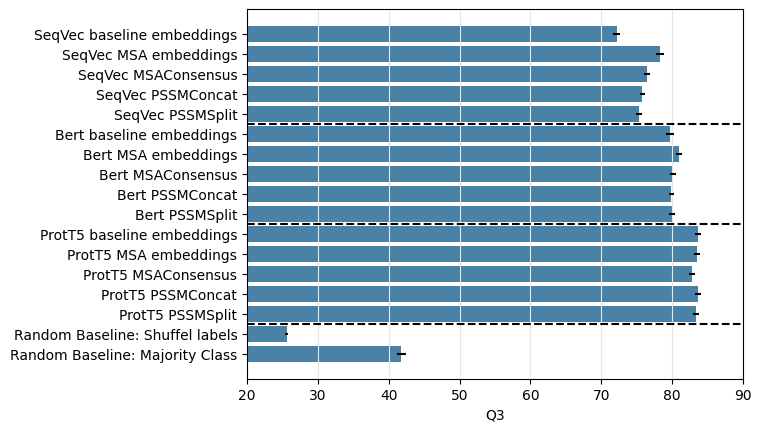

In [80]:
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(y_pos, q3, xerr=se, align='center', color="#4a82a7")
ax.set_yticks(y_pos, labels=labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Q3')
ax.set_xlim([20, 90])

plt.axhline(y=seperator_seqvec,  color='black', ls='--')
plt.axhline(y=seperator_bert,  color='black', ls='--')
plt.axhline(y=seperator_t5,  color='black', ls='--')
plt.grid(axis='x', color='0.9')

plt.show()

Without baselines

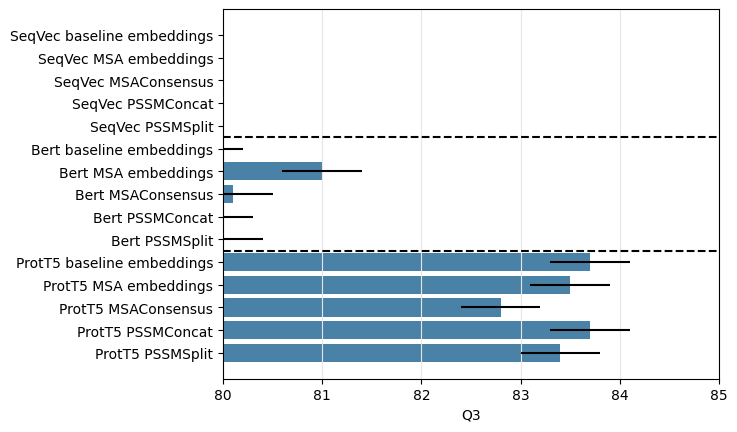

In [81]:
y_pos_no_baseline = np.arange(len(labels[:15]))
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(y_pos_no_baseline, q3[:15], xerr=se[:15], align='center', color="#4a82a7")
ax.set_yticks(y_pos_no_baseline, labels=labels[:15])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Q3')
ax.set_xlim([80, 85])

plt.axhline(y=seperator_seqvec,  color='black', ls='--')
plt.axhline(y=seperator_bert,  color='black', ls='--')
plt.grid(axis='x', color='0.9')

plt.show()

Plot difference to majority class prediction

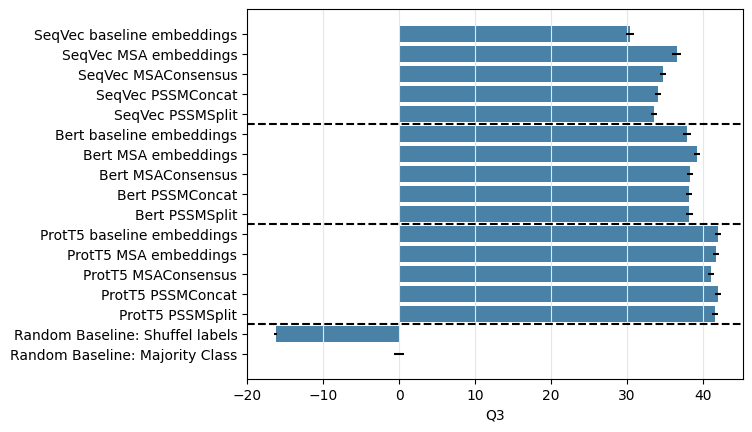

In [82]:
plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(len(labels))

bars = ax.barh(y_pos, difference_to_random, xerr=se, align='center', color="#4a82a7")
ax.set_yticks(y_pos, labels=labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Q3')
ax.set_xlim(left=-20)
# ax.bar_label(bars) IndexError

plt.axhline(y=seperator_seqvec,  color='black', ls='--')
plt.axhline(y=seperator_bert,  color='black', ls='--')
plt.axhline(y=seperator_t5,  color='black', ls='--')
plt.grid(axis='x', color='0.9')

plt.show()

## Plot vertically

In [83]:
x_pos = np.arange(len(labels))

seperator_seqvec = x_pos[4] + (x_pos[5] - x_pos[4])/2
seperator_bert = x_pos[9] + (x_pos[10] - x_pos[9])/2
seperator_t5 = x_pos[14] + (x_pos[15] - x_pos[14])/2

Plot Q3 only

C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\746886284.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right')


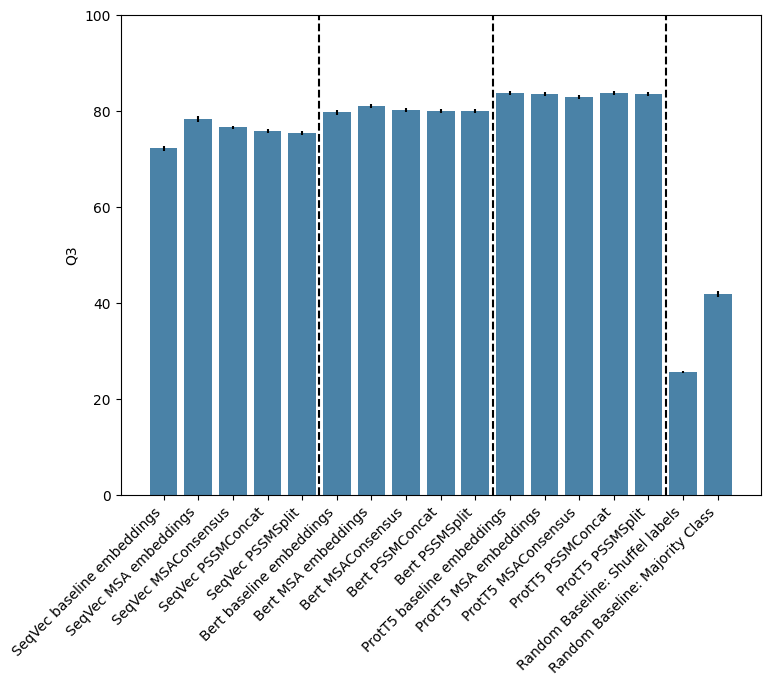

In [84]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(labels, q3, yerr=se, color="#4a82a7")
ax.set_ylim([0, 100])
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel('Q3')

plt.axvline(x=seperator_seqvec,  color='black', ls='--')
plt.axvline(x=seperator_bert,  color='black', ls='--')
plt.axvline(x=seperator_t5,  color='black', ls='--')

plt.show()

Plot difference to majority class prediction

C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\3854827695.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right')


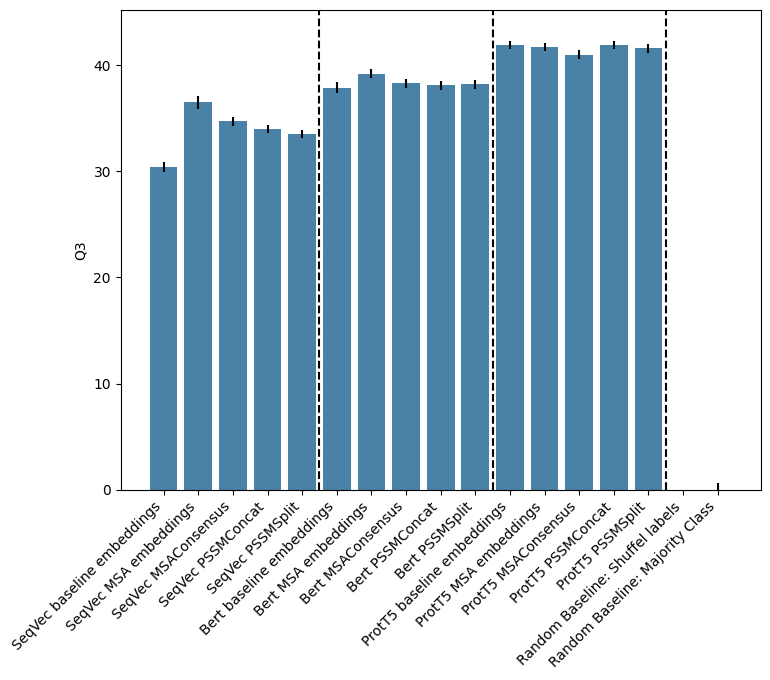

In [85]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_pos = np.arange(len(labels))


ax.bar(labels, difference_to_random, yerr=se, color="#4a82a7")
ax.set_ylim(bottom=0)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel('Q3')

plt.axvline(x=seperator_seqvec,  color='black', ls='--')
plt.axvline(x=seperator_bert,  color='black', ls='--')
plt.axvline(x=seperator_t5,  color='black', ls='--')

plt.show()

# Plot Conservation from embeddings vs. Embeddings + Evolutionary Information (MSAs)

<span style="color:red">TODO!</span>

# Plot SOTA with Evolutionary Information vs. Embeddings

<span style="color:red">TODO: caluclate random for all tasks, more tasks</span>

In [86]:
def color_assignment(embedding_based_list):
    return ['#7db6d2' if int(entry)==0 else ("#4a82a7" if int(entry)==1 else '#b5ecff') for entry in embedding_based_list]

C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\262143337.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(grouped_mcc_labels[::-1], rotation=45, ha='right')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\262143337.py:11: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax1.axvline(x=[2.5],  color='black', ls='--')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\262143337.py:12: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax1.axvline(x=[5.5],  color='black', ls='--')


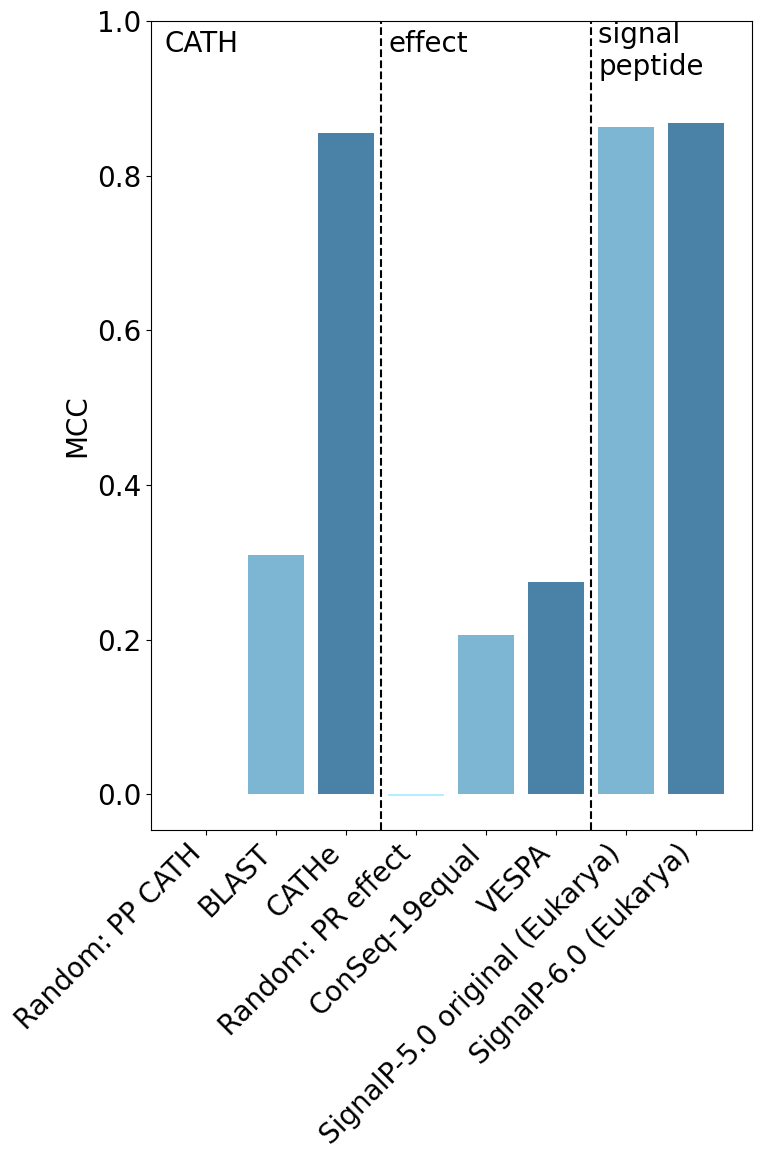

In [111]:
plt.rcParams['font.size'] = '20'

fig1, ((ax1)) = plt.subplots(1,1, figsize=(8,12))
ax1.bar(grouped_mcc_labels[::-1], [float(entry) for entry in mcc][::-1], color=color_assignment(mcc_is_embedding_based[::-1]), width=0.8)
ax1.set_xticklabels(grouped_mcc_labels[::-1], rotation=45, ha='right')
ax1.set_ylabel("MCC")
ax1.set_ylim(top=1)
ax1.annotate('CATH',xy=(-0.6, 0.96))
ax1.annotate('effect',xy=(2.6, 0.96))
ax1.annotate('signal \npeptide',xy=(5.6, 0.93))
ax1.axvline(x=[2.5],  color='black', ls='--')
ax1.axvline(x=[5.5],  color='black', ls='--')

fig1.tight_layout()



C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\70628651.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1_h.set_yticklabels(grouped_mcc_labels)
C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\70628651.py:12: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax1_h.axhline(y=[4.5],  color='black', ls='--')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\70628651.py:13: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax1_h.axhline(y=[1.5],  color='black', ls='--')


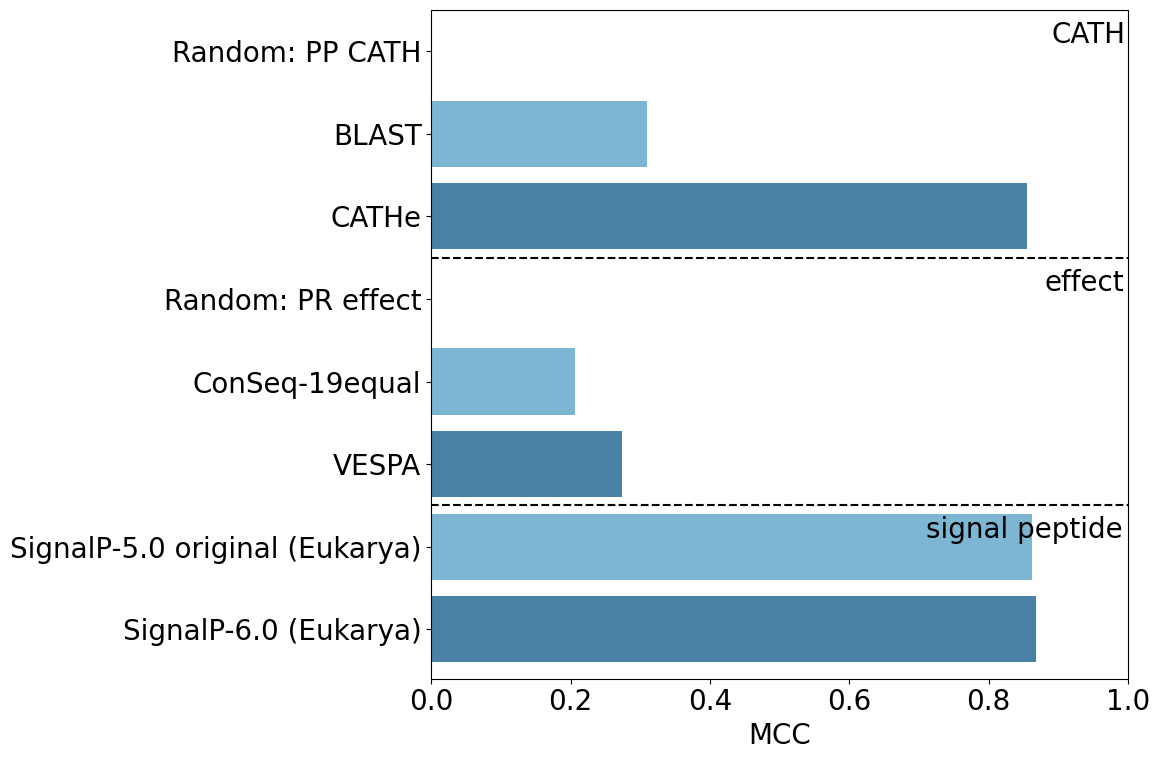

In [118]:
plt.rcParams['font.size'] = '20'

fig1_h, ((ax1_h)) = plt.subplots(1,1, figsize=(12,8))
ax1_h.barh(grouped_mcc_labels, [float(entry) for entry in mcc], color=color_assignment(mcc_is_embedding_based))
ax1_h.set_yticklabels(grouped_mcc_labels)
ax1_h.set_xlabel("MCC")
ax1_h.set_xlim(right=1, left=0)
ax1_h.set_ylim(top=7.5, bottom=-0.6)
ax1_h.annotate('CATH',xy=(0.89, 7.1))
ax1_h.annotate('effect',xy=(0.88, 4.1))
ax1_h.annotate('signal peptide',xy=(0.71, 1.1))
ax1_h.axhline(y=[4.5],  color='black', ls='--')
ax1_h.axhline(y=[1.5],  color='black', ls='--')

fig1_h.tight_layout()


In [89]:
grouped_qx_labels_as_strings = [str(entry) for entry in grouped_qx_labels]
qx_bars_as_float = [float(entry) for entry in qx]
qx_colors = color_assignment(qx_is_embedding_based)

C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\3586523359.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(grouped_qx_labels[::-1], rotation=45, ha='right')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\3586523359.py:10: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax2.axvline(x=[3.5],  color='black', ls='--')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\3586523359.py:11: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax2.axvline(x=[6.5],  color='black', ls='--')


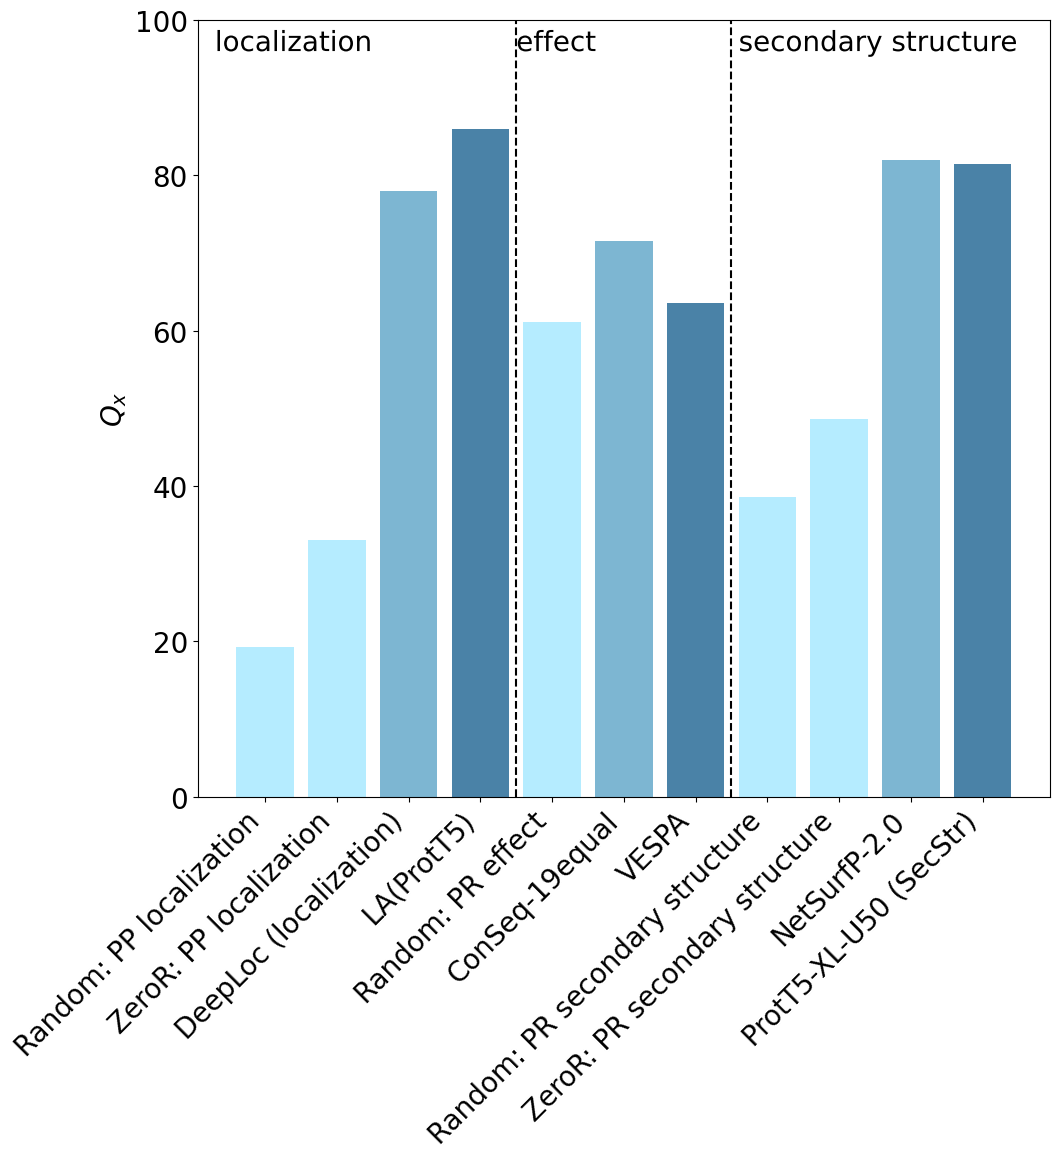

In [90]:
fig2, ((ax2)) = plt.subplots(1,1, figsize=(11,12))

ax2.bar(grouped_qx_labels_as_strings[::-1], qx_bars_as_float[::-1], color=qx_colors[::-1], width=0.8)
ax2.set_xticklabels(grouped_qx_labels[::-1], rotation=45, ha='right')
ax2.set_ylabel("$Q_{x}$")
ax2.set_ylim(top=100)
ax2.annotate('localization',xy=(-0.7, 96), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax2.annotate('effect',xy=(3.5, 96), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax2.annotate('secondary structure',xy=(6.6, 96), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax2.axvline(x=[3.5],  color='black', ls='--')
ax2.axvline(x=[6.5],  color='black', ls='--')

fig2.tight_layout()

C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\3850186949.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2_h.set_yticklabels(grouped_qx_labels)
C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\3850186949.py:11: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax2_h.axhline(y=[3.5],  color='black', ls='--')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\3850186949.py:12: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax2_h.axhline(y=[6.5],  color='black', ls='--')


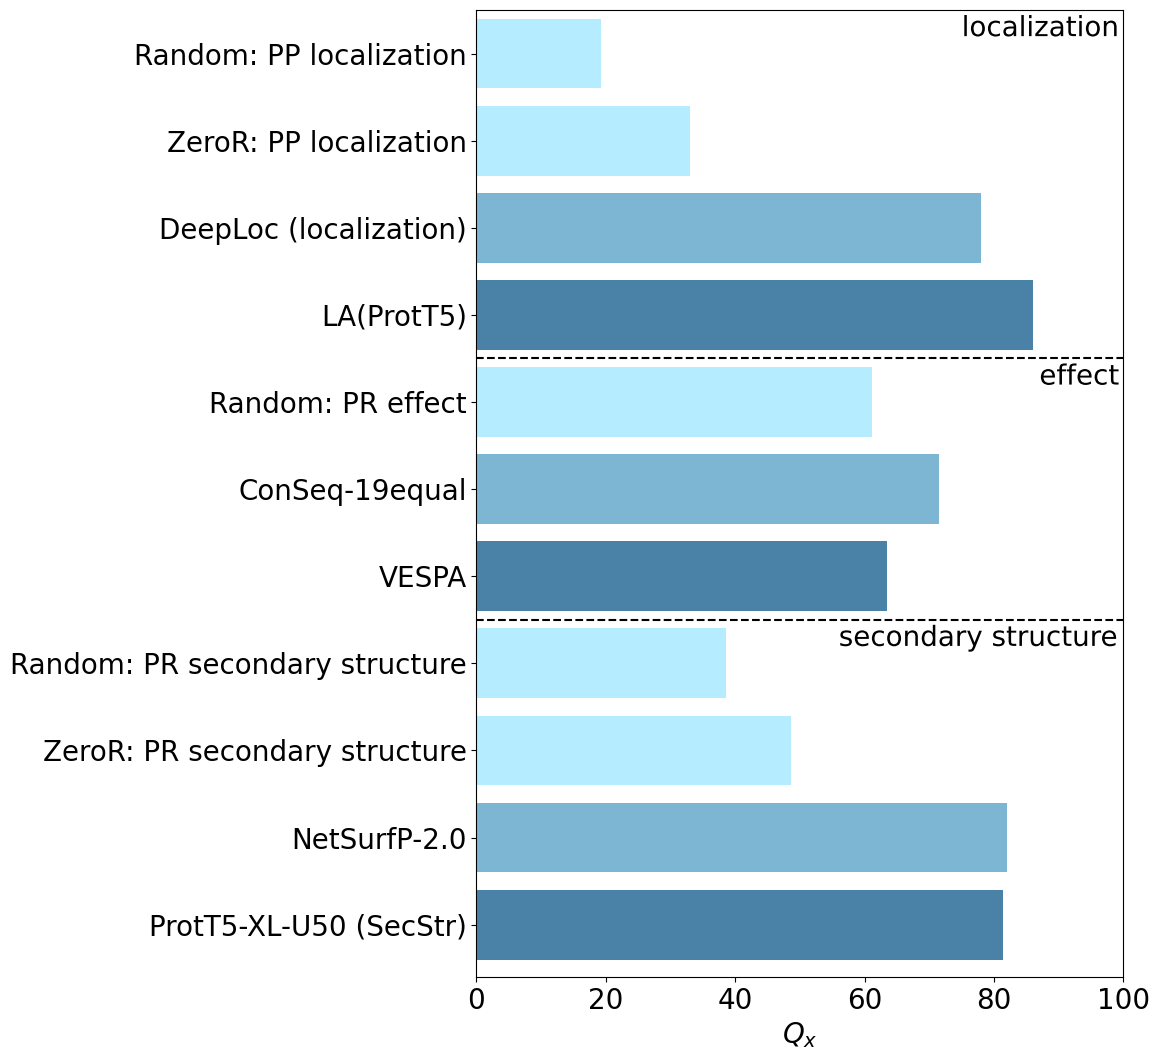

In [91]:
fig2_h, ((ax2_h)) = plt.subplots(1,1, figsize=(12,11))

ax2_h.barh(grouped_qx_labels_as_strings, qx_bars_as_float, color=color_assignment(qx_is_embedding_based))
ax2_h.set_yticklabels(grouped_qx_labels)
ax2_h.set_xlabel("$Q_{x}$")
ax2_h.set_xlim(right=100, left=0)
ax2_h.set_ylim(top=10.5, bottom=-0.6)
ax2_h.annotate('localization',xy=(75, 10.2), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax2_h.annotate('effect',xy=(87, 6.2), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax2_h.annotate('secondary structure',xy=(56, 3.2), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax2_h.axhline(y=[3.5],  color='black', ls='--')
ax2_h.axhline(y=[6.5],  color='black', ls='--')

fig2_h.tight_layout()


C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\2842169626.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(grouped_f1_labels[::-1], rotation=45, ha='right')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\2842169626.py:8: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax3.axvline(x=[2.5],  color='black', ls='--')


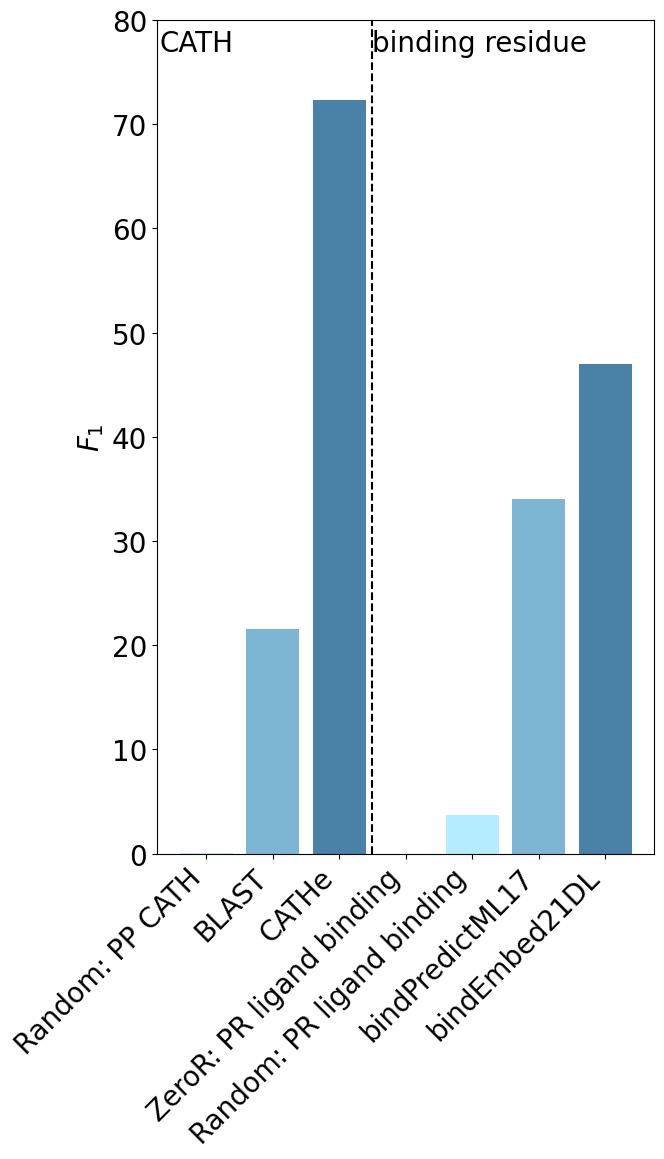

In [92]:
fig3, ((ax3)) = plt.subplots(1,1, figsize=(7,12))
ax3.bar(grouped_f1_labels[::-1], [float(entry) for entry in f1][::-1], color=color_assignment(f1_is_embedding_based[::-1]), width=0.8)
ax3.set_xticklabels(grouped_f1_labels[::-1], rotation=45, ha='right')
ax3.set_ylabel("$F_{1}$")
ax3.set_ylim(top=80)
ax3.annotate('CATH',xy=(-0.7, 77))
ax3.annotate('binding residue',xy=(2.5, 77))
ax3.axvline(x=[2.5],  color='black', ls='--')

fig3.tight_layout()

C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\3267480161.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3_h.set_yticklabels(grouped_f1_labels)
C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\3267480161.py:9: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax3_h.axhline(y=[3.5],  color='black', ls='--')


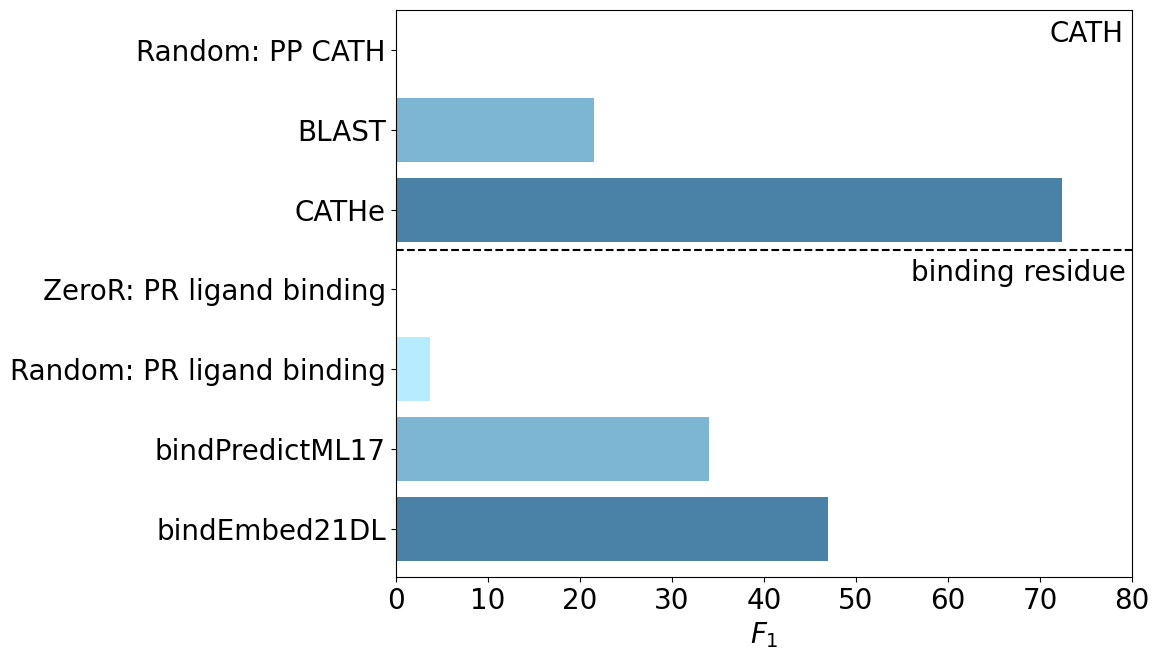

In [93]:
fig3_h, ((ax3_h)) = plt.subplots(1,1, figsize=(12,7))
ax3_h.barh(grouped_f1_labels, [float(entry) for entry in f1], color=color_assignment(f1_is_embedding_based))
ax3_h.set_yticklabels(grouped_f1_labels)
ax3_h.set_xlabel("$F_{1}$")
ax3_h.set_xlim(right=80, left=0)
ax3_h.set_ylim(top=6.5, bottom=-0.6)
ax3_h.annotate('CATH',xy=(71, 6.1))
ax3_h.annotate('binding residue',xy=(56, 3.1))
ax3_h.axhline(y=[3.5],  color='black', ls='--')

fig3_h.tight_layout()

C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\2547623036.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(grouped_precision_labels[::-1], rotation=45, ha='right')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\2547623036.py:11: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax4.axvline(x=[3.5],  color='black', ls='--')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\2547623036.py:12: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax4.axvline(x=[7.5],  color='black', ls='--')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\2547623036.py:13: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated

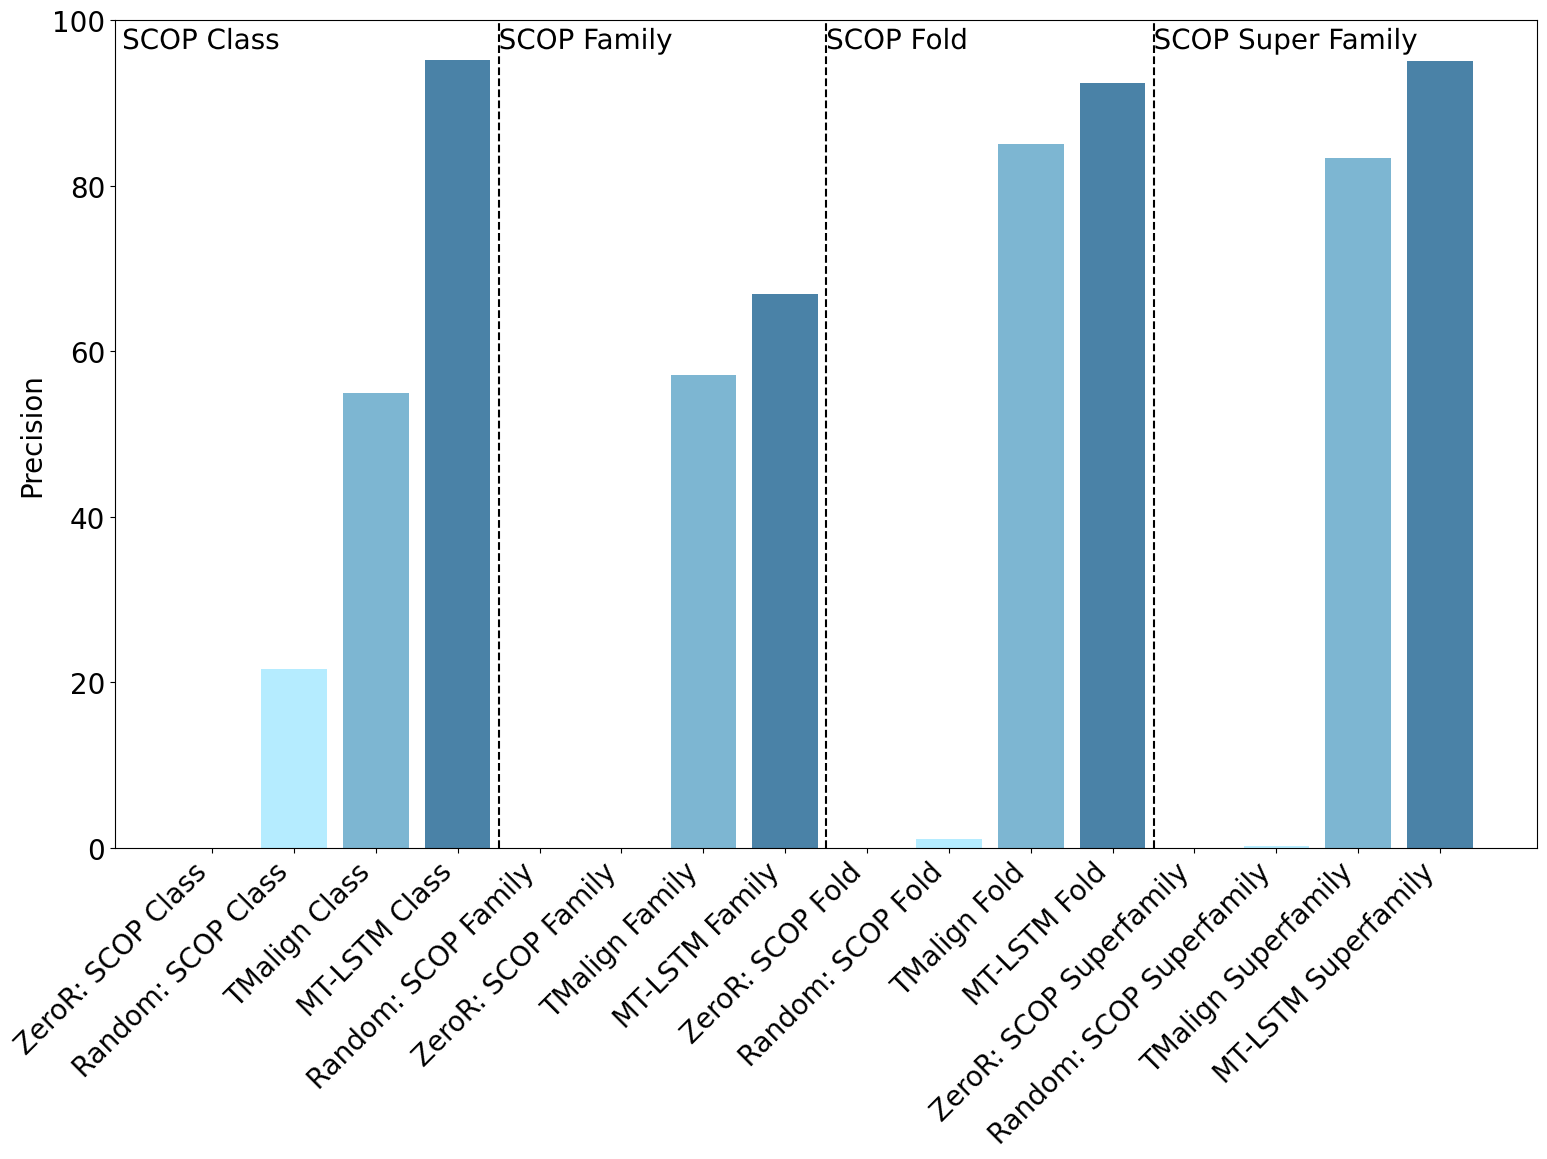

In [94]:
fig4, ((ax4)) = plt.subplots(1,1, figsize=(16,12))

ax4.bar(grouped_precision_labels[::-1], [float(entry) for entry in precision][::-1], color=color_assignment(precision_is_embedding_based[::-1]), width=0.8)
ax4.set_xticklabels(grouped_precision_labels[::-1], rotation=45, ha='right')
ax4.set_ylabel("Precision")
ax4.set_ylim(top=100)
ax4.annotate('SCOP Class',xy=(-1.1, 96.5), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax4.annotate('SCOP Family',xy=(3.5, 96.5), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax4.annotate('SCOP Fold',xy=(7.5, 96.5), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax4.annotate('SCOP Super Family',xy=(11.5, 96.5), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax4.axvline(x=[3.5],  color='black', ls='--')
ax4.axvline(x=[7.5],  color='black', ls='--')
ax4.axvline(x=[11.5],  color='black', ls='--')

fig4.tight_layout()

C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\1698010009.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4_h.set_yticklabels(grouped_precision_labels)
C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\1698010009.py:12: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax4_h.axhline(y=[3.5],  color='black', ls='--')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\1698010009.py:13: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax4_h.axhline(y=[7.5],  color='black', ls='--')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\1698010009.py:14: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support wi

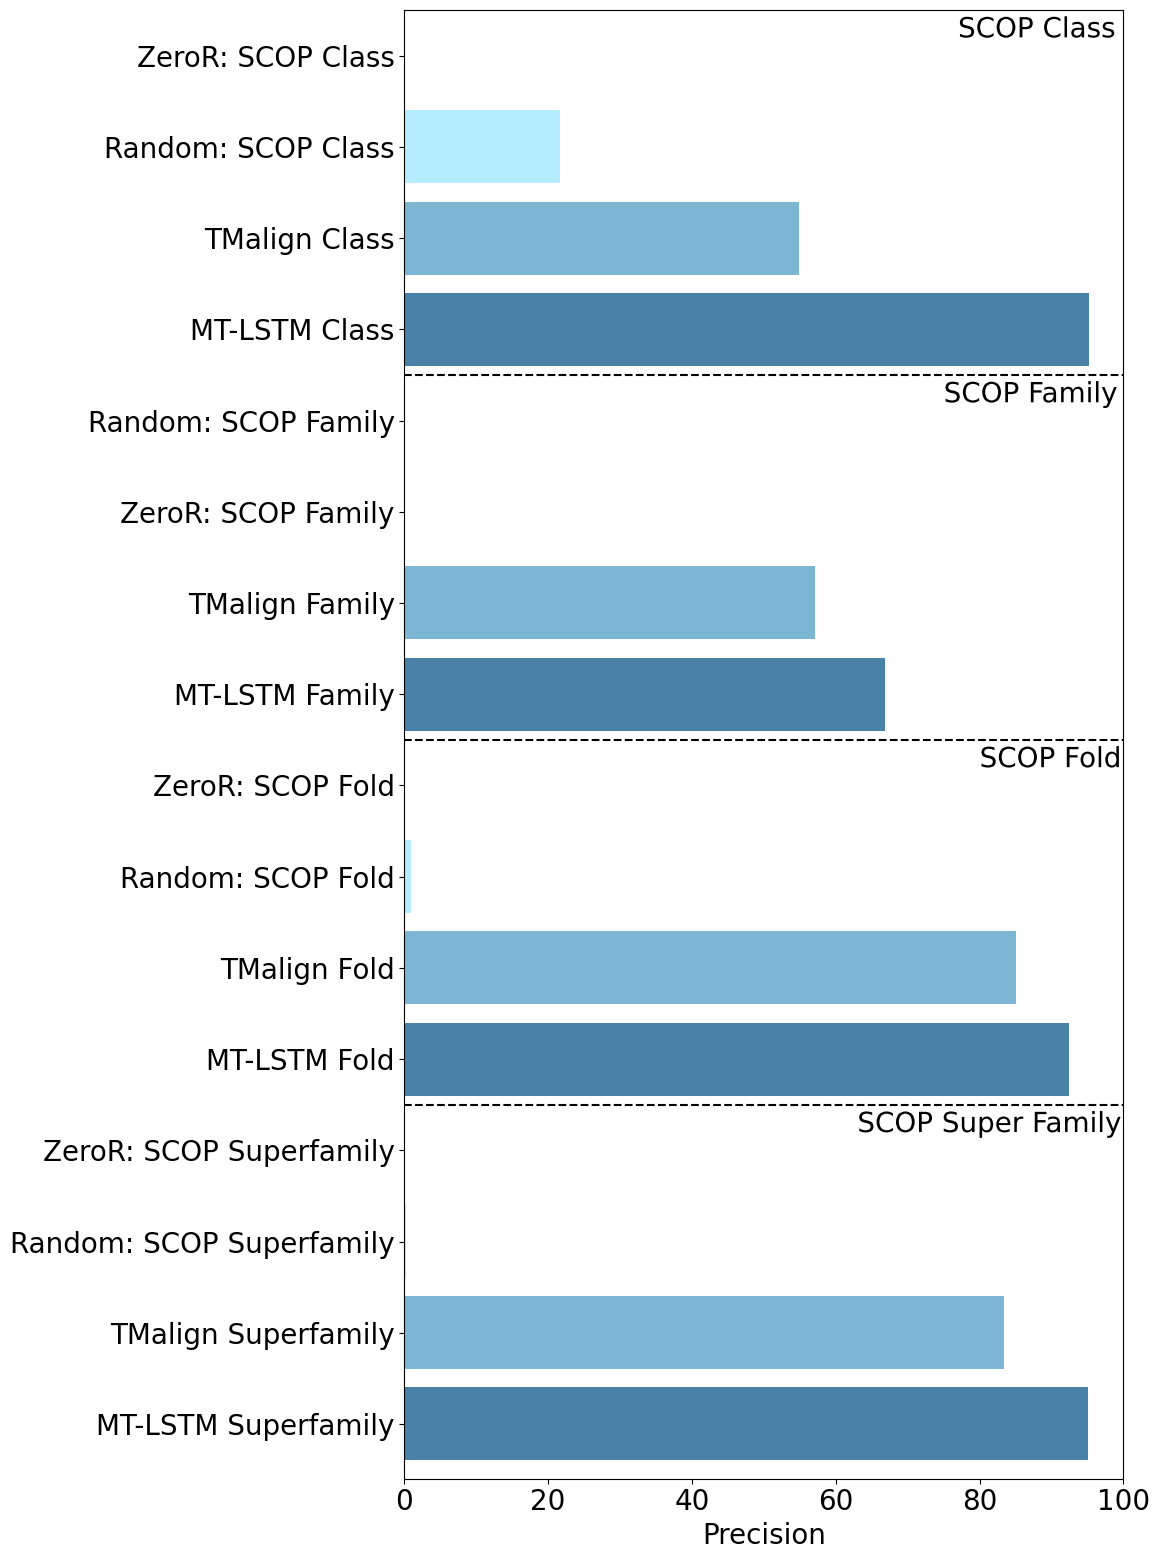

In [95]:
fig4_h, ((ax4_h)) = plt.subplots(1,1, figsize=(12,16))

ax4_h.barh(grouped_precision_labels, [float(entry) for entry in precision], color=color_assignment(precision_is_embedding_based))
ax4_h.set_yticklabels(grouped_precision_labels)
ax4_h.set_xlabel("Precision")
ax4_h.set_xlim(right=100, left=0)
ax4_h.set_ylim(top=15.5, bottom=-0.6)
ax4_h.annotate('SCOP Class',xy=(77, 15.2), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax4_h.annotate('SCOP Family',xy=(75, 11.2), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax4_h.annotate('SCOP Fold',xy=(80, 7.2), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax4_h.annotate('SCOP Super Family',xy=(63, 3.2), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax4_h.axhline(y=[3.5],  color='black', ls='--')
ax4_h.axhline(y=[7.5],  color='black', ls='--')
ax4_h.axhline(y=[11.5],  color='black', ls='--')

fig4_h.tight_layout()

C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\2006250449.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(grouped_spearman_labels[::-1], rotation=45, ha='right')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\2006250449.py:9: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax5.axvline(x=[1.5],  color='black', ls='--')


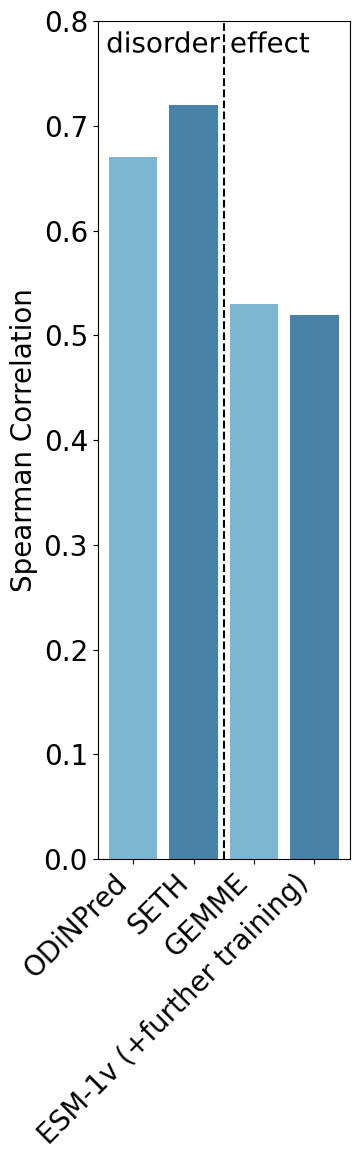

In [96]:
fig5, ((ax5)) = plt.subplots(1,1, figsize=(4,12))

ax5.bar(grouped_spearman_labels[::-1], [float(entry) for entry in spearman][::-1], color=color_assignment(spearman_is_embedding_based[::-1]), width=0.8)
ax5.set_xticklabels(grouped_spearman_labels[::-1], rotation=45, ha='right')
ax5.set_ylabel("Spearman Correlation")
ax5.set_ylim(top=.8)
ax5.annotate('disorder',xy=(-0.45, 0.77), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax5.annotate('effect',xy=(1.6, 0.77), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax5.axvline(x=[1.5],  color='black', ls='--')

fig5.tight_layout()

C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\1344488631.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5_h.set_yticklabels(grouped_spearman_labels)
C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\1344488631.py:10: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax5_h.axhline(y=[1.5],  color='black', ls='--')


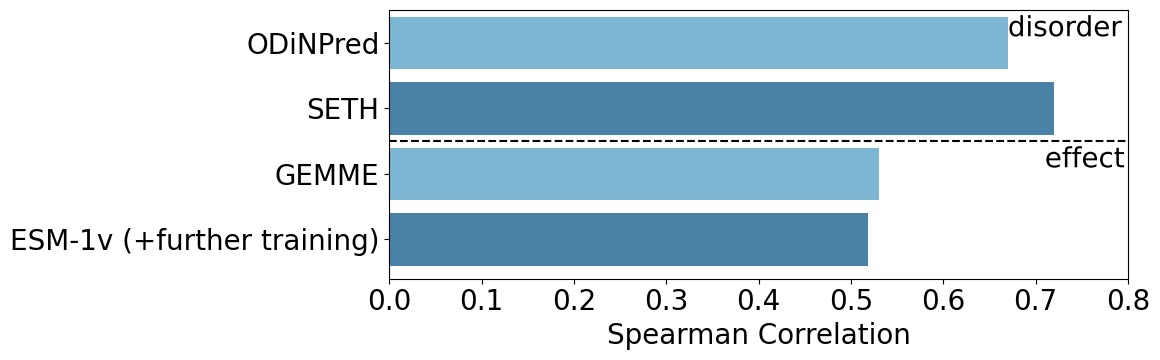

In [97]:
fig5_h, ((ax5_h)) = plt.subplots(1,1, figsize=(12,4))

ax5_h.barh(grouped_spearman_labels, [float(entry) for entry in spearman], color=color_assignment(spearman_is_embedding_based))
ax5_h.set_yticklabels(grouped_spearman_labels)
ax5_h.set_xlabel("Spearman Correlation")
ax5_h.set_xlim(right=.8, left=0)
ax5_h.set_ylim(top=3.5, bottom=-0.6)
ax5_h.annotate('disorder',xy=(0.67, 3.1), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax5_h.annotate('effect',xy=(0.71, 1.1), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax5_h.axhline(y=[1.5],  color='black', ls='--')

fig5_h.tight_layout()

C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\2480304767.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax6.set_xticklabels(grouped_recall_labels[::-1], rotation=45, ha='right')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\2480304767.py:10: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax6.axvline(x=[2.5],  color='black', ls='--')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\2480304767.py:11: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax6.axvline(x=[5.5],  color='black', ls='--')


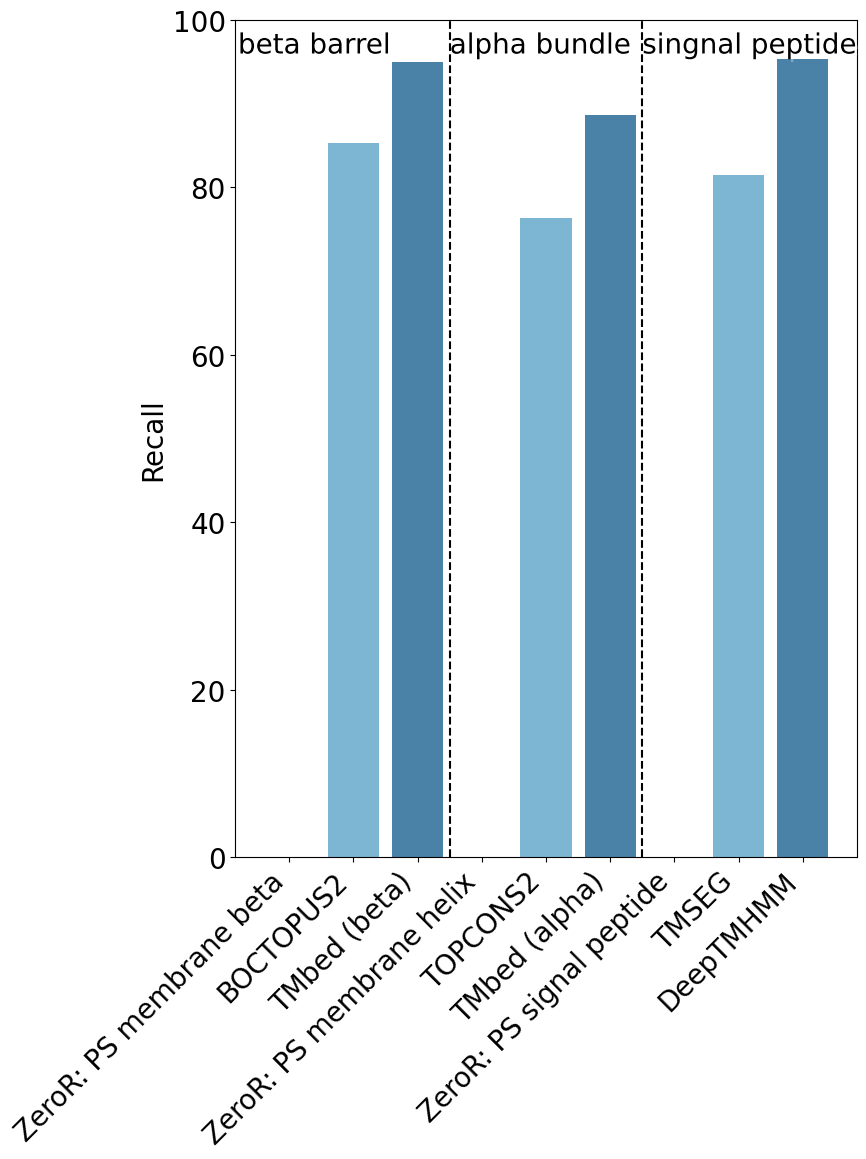

In [98]:
fig6, ((ax6)) = plt.subplots(1,1, figsize=(9,12))

ax6.bar(grouped_recall_labels[::-1], [float(entry) for entry in recall][::-1], color=color_assignment(recall_is_embedding_based[::-1]), width=0.8)
ax6.set_xticklabels(grouped_recall_labels[::-1], rotation=45, ha='right')
ax6.set_ylabel("Recall")
ax6.set_ylim(top=100)
ax6.annotate('beta barrel',xy=(-0.8, 96), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax6.annotate('alpha bundle',xy=(2.5, 96), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax6.annotate('singnal peptide',xy=(5.5, 96), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax6.axvline(x=[2.5],  color='black', ls='--')
ax6.axvline(x=[5.5],  color='black', ls='--')

fig6.tight_layout()

C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\3834099221.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax6_h.set_yticklabels(grouped_recall_labels)
C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\3834099221.py:11: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax6_h.axhline(y=[2.5],  color='black', ls='--')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\3834099221.py:12: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax6_h.axhline(y=[5.5],  color='black', ls='--')


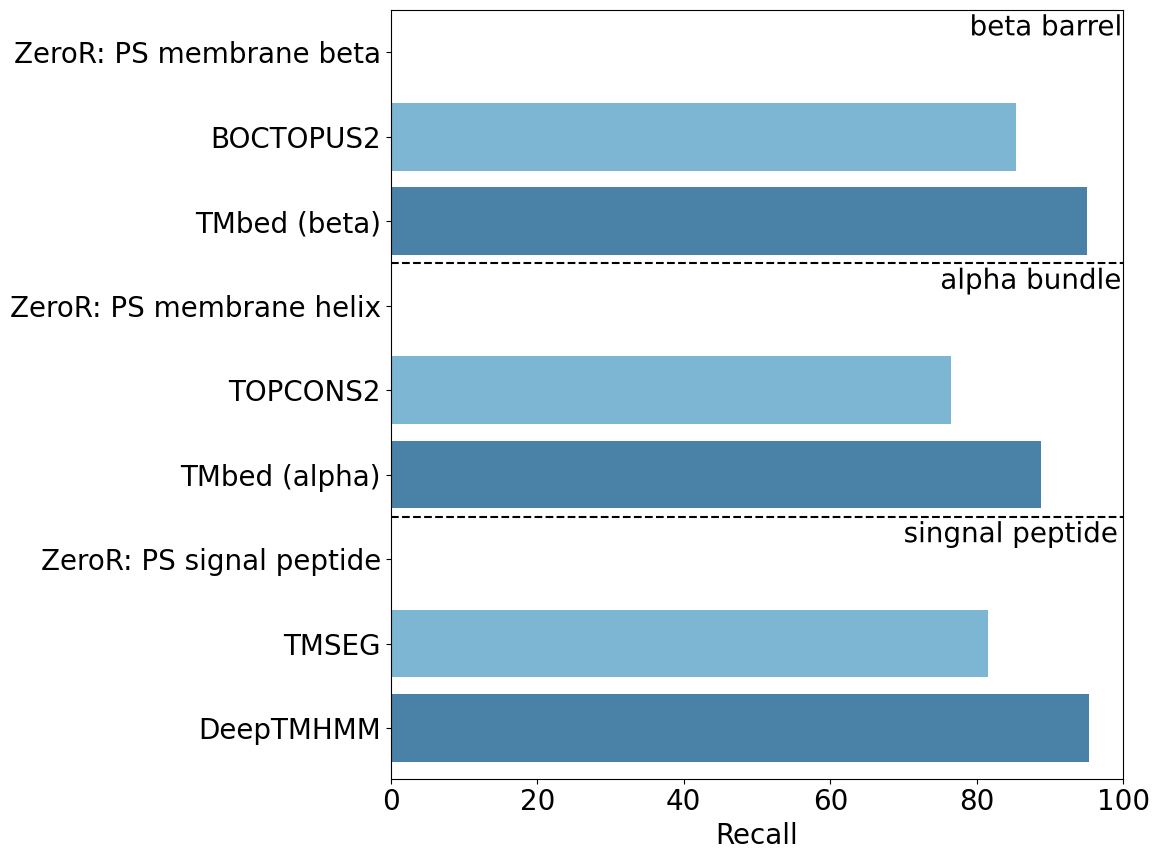

In [99]:
fig6_h, ((ax6_h)) = plt.subplots(1,1, figsize=(12,9))

ax6_h.barh(grouped_recall_labels, [float(entry) for entry in recall], color=color_assignment(recall_is_embedding_based))
ax6_h.set_yticklabels(grouped_recall_labels)
ax6_h.set_xlabel("Recall")
ax6_h.set_xlim(right=100, left=0)
ax6_h.set_ylim(top=8.5, bottom=-0.6)
ax6_h.annotate('beta barrel',xy=(79, 8.2), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax6_h.annotate('alpha bundle',xy=(75, 5.2), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax6_h.annotate('singnal peptide',xy=(70, 2.2), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax6_h.axhline(y=[2.5],  color='black', ls='--')
ax6_h.axhline(y=[5.5],  color='black', ls='--')

fig6_h.tight_layout()

C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\213787661.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax7.set_xticklabels(grouped_fmax_labels[::-1], rotation=45, ha='right')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\213787661.py:10: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax7.axvline(x=[1.5],  color='black', ls='--')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\213787661.py:11: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax7.axvline(x=[3.5],  color='black', ls='--')


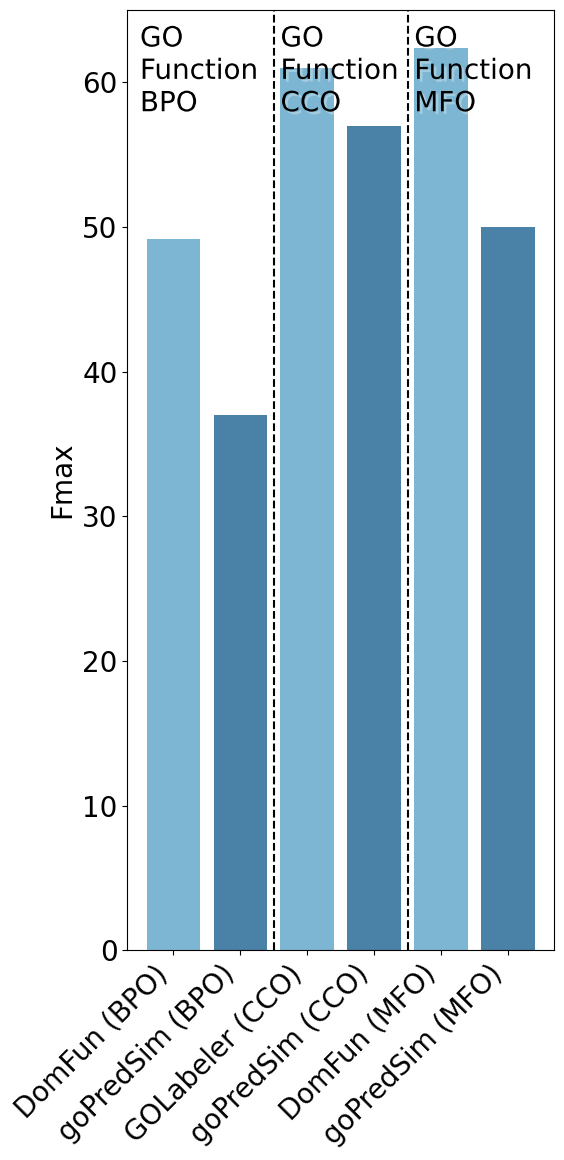

In [100]:
fig7, ((ax7)) = plt.subplots(1,1, figsize=(6,12))

ax7.bar(grouped_fmax_labels[::-1], [float(entry) for entry in fmax][::-1], color=color_assignment(fmax_is_embedding_based[::-1]))
ax7.set_xticklabels(grouped_fmax_labels[::-1], rotation=45, ha='right')
ax7.set_ylabel("Fmax")
ax7.set_ylim(top=65)
ax7.annotate('GO \nFunction \nBPO',xy=(-0.5, 58), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax7.annotate('GO \nFunction \nCCO',xy=(1.6, 58), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax7.annotate('GO \nFunction \nMFO',xy=(3.6, 58), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax7.axvline(x=[1.5],  color='black', ls='--')
ax7.axvline(x=[3.5],  color='black', ls='--')

fig7.tight_layout()

C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\3837066534.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax7_h.set_yticklabels(grouped_fmax_labels)
C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\3837066534.py:11: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax7_h.axhline(y=[1.5],  color='black', ls='--')
C:\Users\kyrae\AppData\Local\Temp\ipykernel_23460\3837066534.py:12: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax7_h.axhline(y=[3.5],  color='black', ls='--')


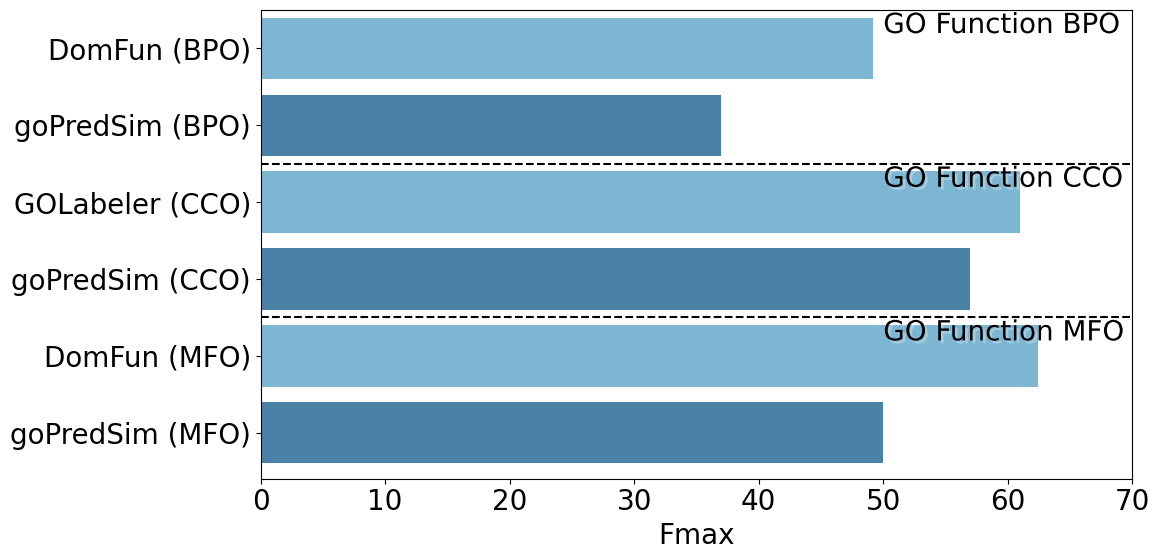

In [101]:
fig7_h, ((ax7_h)) = plt.subplots(1,1, figsize=(12,6))

ax7_h.barh(grouped_fmax_labels, [float(entry) for entry in fmax], color=color_assignment(fmax_is_embedding_based))
ax7_h.set_yticklabels(grouped_fmax_labels)
ax7_h.set_xlabel("Fmax")
ax7_h.set_xlim(right=70)
ax7_h.set_ylim(top=5.5, bottom=-0.6)
ax7_h.annotate('GO Function BPO',xy=(50, 5.2), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax7_h.annotate('GO Function CCO',xy=(50, 3.2), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax7_h.annotate('GO Function MFO',xy=(50, 1.2), path_effects=[path_effects.withSimplePatchShadow(shadow_rgbFace='white')])
ax7_h.axhline(y=[1.5],  color='black', ls='--')
ax7_h.axhline(y=[3.5],  color='black', ls='--')

fig7_h.tight_layout()

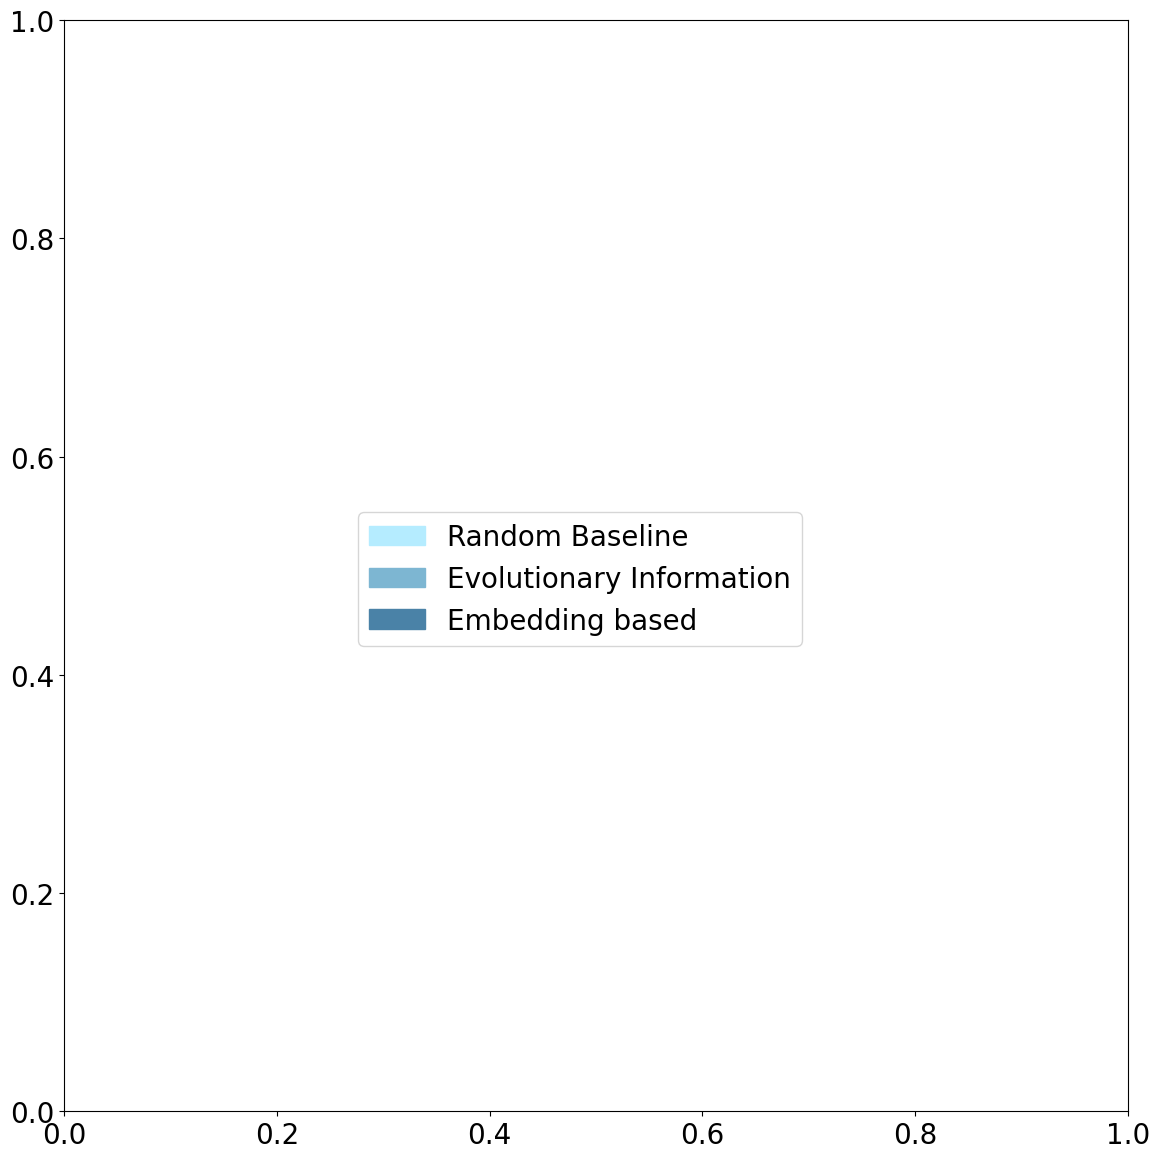

In [102]:
fig8, ((ax8)) = plt.subplots(1,1, figsize=(12,12))

legend_EB = mpatches.Patch(color="#4a82a7", label='Embedding based')
legend_EI = mpatches.Patch(color='#7db6d2', label='Evolutionary Information')
legend_Random = mpatches.Patch(color='#b5ecff', label='Random Baseline')

fig8.legend(handles=[legend_Random, legend_EI, legend_EB], loc='center')
fig8.tight_layout()

## Information Content
Alternative to different performance measures: Compute and display information Content

In [103]:
def compute_information_content(confusion_matrix):
    cm_size = len(confusion_matrix)
    nr_samples = sum(sum(row) for row in confusion_matrix)
    a_i = [sum(row) for row in confusion_matrix]
    b_i = [0 for k in range(0, cm_size)]
    for i in range(0,cm_size):
        b_i = [x + y for x,y in zip(b_i ,[confusion_matrix[i][j] for j in range(0, cm_size)])]
    numerator = sum([a*np.log(a)for a in a_i]) - sum([confusion_matrix[i][i]*np.log(confusion_matrix[i][i])for i in range(0, cm_size)]) 
    denominator = nr_samples*np.log(nr_samples) - sum([b*np.log(b) for b in b_i]) 
    information_content = 1-numerator/denominator
    return information_content